# 2.2 Data Preparation

In [11]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [12]:
!wget $data 

--2024-09-12 08:20:26--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  3.17MB/s    in 0.4s    

2024-09-12 08:20:27 (3.17 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [13]:
import pandas as pd


df = pd.read_csv("data.csv")

Check first rows of a DataFrame

In [14]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Let's do some data cleaning. First, let's make column spaces consistent with lower caps and underscores as separators.

In [16]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
)

In [18]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


The colum names have been standardized. Let's now take care of the values:

In [22]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

The string columns are of type object. Let's select those. Also we will convert those to `str`, since that will take up less memory.

In [43]:
object_columns_list = df.select_dtypes(object).columns

df[object_columns_list] = (
    df.select_dtypes(object)
    .apply(lambda x: (
        x
        .str.lower()
        .str.replace(" ", "_")
    ) 
    , axis='index')
)

In [44]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


# 2.3 Data Cleaning

In [ ]:
import pandas as pd


df = pd.read_csv("data.csv")

Let's do some data cleaning. First, let's make column spaces consistent with lower caps and underscores as separators.

In [ ]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
)

The colum names have been standardized. Let's now take care of the values:

The string columns are of type object. Let's select those. Also we will convert those to `str`, since that will take up less memory.

In [ ]:
object_columns_list = df.select_dtypes(object).columns

df[object_columns_list] = (
    df.select_dtypes(object)
    .apply(lambda x: (
        x
        .str.lower()
        .str.replace(" ", "_")
    ) 
    , axis='index')
)

In [ ]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Check 5 unique values per column (first with `.apply()`, then with for-loop):

In [ ]:
df.apply(lambda x: print(x.name, "\n", x.unique()[:5], "\n"), axis="index");

make 
 ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler'] 

model 
 ['1_series_m' '1_series' '100' '124_spider' '190-class'] 

year 
 [2011 2012 2013 1992 1993] 

engine_fuel_type 
 ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'] 

engine_hp 
 [335. 300. 230. 320. 172.] 

engine_cylinders 
 [ 6.  4.  5.  8. 12.] 

transmission_type 
 ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown'] 

driven_wheels 
 ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive'] 

number_of_doors 
 [ 2.  4.  3. nan] 

market_category 
 ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance'] 

vehicle_size 
 ['compact' 'midsize' 'large'] 

vehicle_style 
 ['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback'] 

highway_mpg 
 [26 28 27 25 24] 

city_mpg 
 [19 20 18 17 16] 

popularity 
 [3916 3105  819  617 1013] 

msrp 
 [46135 40650 36350 2945

In [ ]:
for col in df.columns:
    print(col, "\n", df[col].unique()[:5], "\n")

make 
 ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler'] 

model 
 ['1_series_m' '1_series' '100' '124_spider' '190-class'] 

year 
 [2011 2012 2013 1992 1993] 

engine_fuel_type 
 ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'] 

engine_hp 
 [335. 300. 230. 320. 172.] 

engine_cylinders 
 [ 6.  4.  5.  8. 12.] 

transmission_type 
 ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown'] 

driven_wheels 
 ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive'] 

number_of_doors 
 [ 2.  4.  3. nan] 

market_category 
 ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance'] 

vehicle_size 
 ['compact' 'midsize' 'large'] 

vehicle_style 
 ['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback'] 

highway_mpg 
 [26 28 27 25 24] 

city_mpg 
 [19 20 18 17 16] 

popularity 
 [3916 3105  819  617 1013] 

msrp 
 [46135 40650 36350 2945

Show number of unique values per column:

In [ ]:
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's plot a histogram:

<Axes: xlabel='msrp', ylabel='Count'>

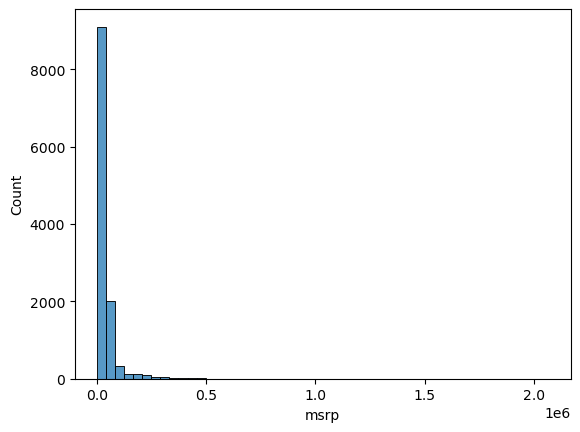

In [ ]:
sns.histplot(df.msrp, bins=50)

This is called a 'long-tail distribution', where there are some outliers. To deal with this, we can provide a cut-off price. Let's cut it off at 100,000:

<Axes: xlabel='msrp', ylabel='Count'>

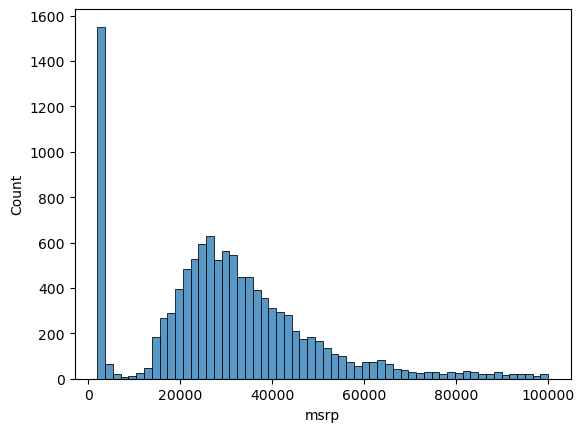

In [ ]:
sns.histplot(df.msrp[df.msrp < 100_000])

The peak on the left is likely to be the minimum price:

In [ ]:
df.msrp.sort_values()

775         2000
767         2000
768         2000
769         2000
770         2000
          ...   
6351     1382750
8486     1500000
11363    1500000
11364    1705769
11362    2065902
Name: msrp, Length: 11914, dtype: int64

In [ ]:
(df.msrp==2000).sum()

np.int64(1036)

A long-tail distribution is not good for Machine Learning models, it will confuse them. We can deal with this by a logarithmic transformation of the data.

In [ ]:
import numpy as np


x = [0, 1, 10, 100, 1_000, 10_000, 100_000]
y = np.log1p(x)

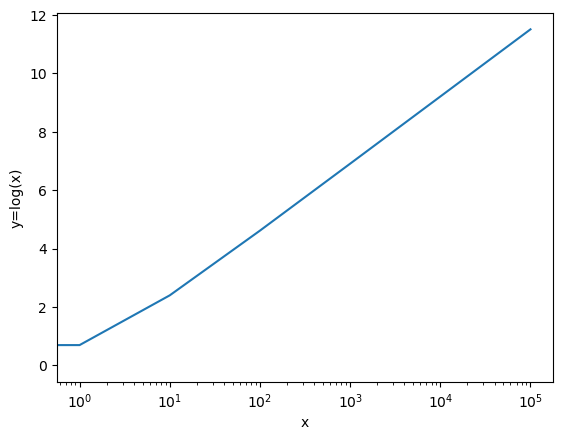

In [ ]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y=log(x)")
plt.xscale("log")

The log transformation ensures that even for very large values of x, y does not explode in magnitude.

In [ ]:
np.log1p(df.msrp)

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

Text(0.5, 1.0, 'With log transform')

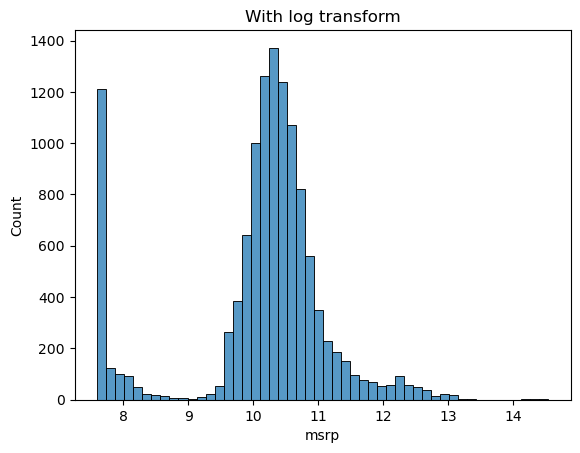

In [ ]:
sns.histplot(np.log1p(df.msrp), bins=50).set_title("With log transform")

Text(0.5, 1.0, 'Without log transform')

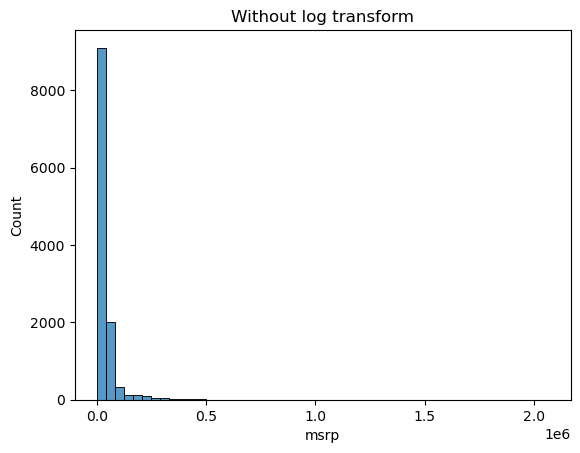

In [ ]:
sns.histplot(df.msrp, bins=50).set_title("Without log transform")

We can see that with the log transformation, the price columnn `df.msrp` now looks like more like a normal distribution than a long-tail distribution. This way we don't need to discard data and our ML model will be able to use this column.

Let's now check missing values

In [ ]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up the validation framework